In [3]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib import cm

from sklearn.cluster import KMeans

import acquire

from pydataset import data


# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

import acquire
import explore
import prepare
import zillow_wrangle
import viz_kmeans


iris = acquire.get_iris_data()

In [2]:
#acquire the iris dataset.
# used X = iris[['petal_length', 'sepal_length']] in lesson, cant use thes in this exercise.f.head()
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.10,3.50,1.40,0.20,setosa
1,1,2,4.90,3.00,1.40,0.20,setosa
2,1,3,4.70,3.20,1.30,0.20,setosa
3,1,4,4.60,3.10,1.50,0.20,setosa
4,1,5,5.00,3.60,1.40,0.20,setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      150 non-null    int64  
 1   measurement_id  150 non-null    int64  
 2   sepal_length    150 non-null    float64
 3   sepal_width     150 non-null    float64
 4   petal_length    150 non-null    float64
 5   petal_width     150 non-null    float64
 6   species_name    150 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ KB


In [4]:
iris.describe()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00,150.00,150.00
mean,2.00,75.50,5.84,3.06,3.76,1.20
std,0.82,43.45,0.83,0.44,1.77,0.76
min,1.00,1.00,4.30,2.00,1.00,0.10
25%,1.00,38.25,5.10,2.80,1.60,0.30
50%,2.00,75.50,5.80,3.00,4.35,1.30
75%,3.00,112.75,6.40,3.30,5.10,1.80
max,3.00,150.00,7.90,4.40,6.90,2.50


-------------------------


### 1.) Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

- a.) Choose features other than the ones used in the lesson.
- b.) Visualize the results of your clustering.
- c.) Use the elbow method to visually select a good value for k.
- d.) Repeat the clustering, this time with 3 different features.

In [5]:
#a.) choose features
X = iris[['petal_width', 'sepal_width']] 


In [6]:
# Scale the X features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [7]:
#Utilize the kmeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

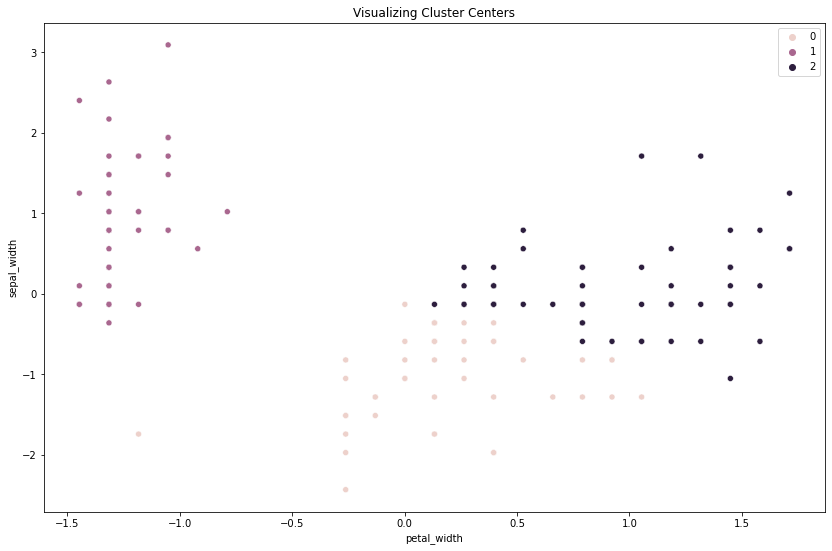

In [8]:
#b.) vizualize the clusters
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y = 'sepal_width', data = X_scaled, hue = 'cluster')
# plot cluster centers (centroids)

plt.title('Visualizing Cluster Centers')
plt.legend();

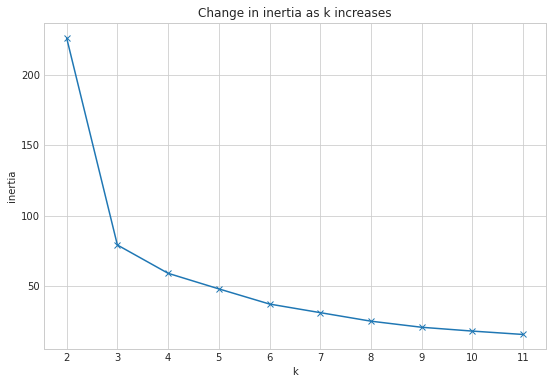

In [9]:
# use elbow method
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    #drop of at 3

In [10]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,petal_width,sepal_width
0,0.19,-1.03
1,-1.26,0.91
2,0.97,0.08


Text(0.5, 1.0, 'Visualizing Cluster Centers')

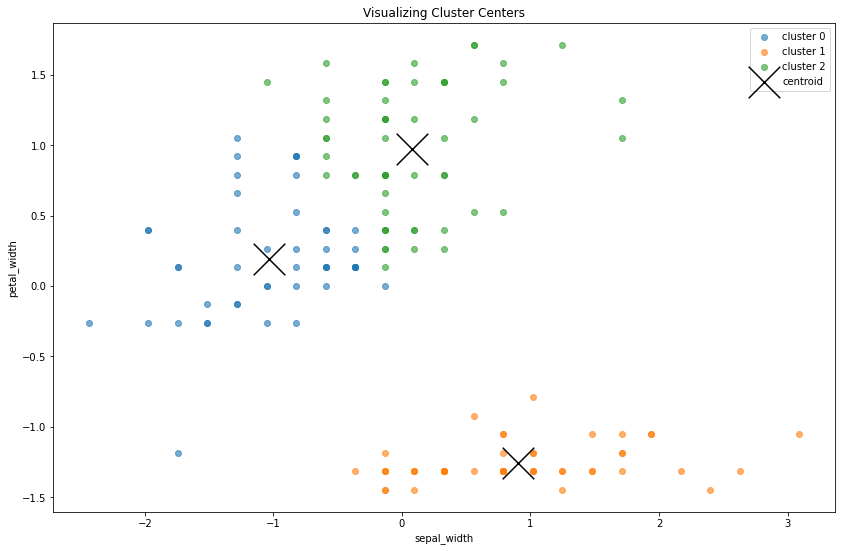

In [11]:
plt.figure(figsize=(14, 9))

for cluster, subset in X_scaled.groupby('cluster'):
    plt.scatter(subset.sepal_width, subset.petal_width, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_width', x='sepal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers')

In [12]:
#d.)repeat with three features

In [22]:
#acquiring the dataset
iris = acquire.get_iris_data()

In [23]:
#selected the features
X = iris[['petal_width', 'sepal_width', 'sepal_length']] 

In [26]:
# Scale the X features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [27]:
######Defining##############

# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [28]:
# make a new column names cluster in iris and X_scaled dataframe
iris['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

In [29]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids_scaled

,petal_width,sepal_width,sepal_length
0,1.01,0.13,1.14
1,-1.26,0.91,-1.00
2,0.28,-0.91,-0.06


Text(0.5, 1.0, 'Visualizing Cluster Centers')

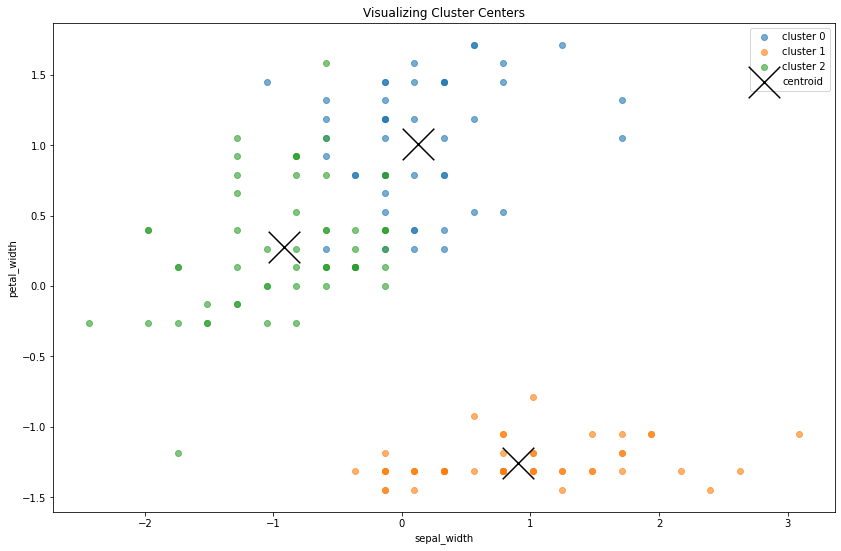

In [30]:
plt.figure(figsize=(14, 9))

for cluster, subset in X_scaled.groupby('cluster'):
    plt.scatter(subset.sepal_width, subset.petal_width, label='cluster ' + str(cluster), alpha=.6)

centroids_scaled.plot.scatter(y='petal_width', x='sepal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers')

------------------

### 2.) Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [3]:
mall = acquire.get_mall_data()
mall.head()


,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#selected the features
X = mall[['age', 'spending_score']] 

In [5]:
# Scale the X features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

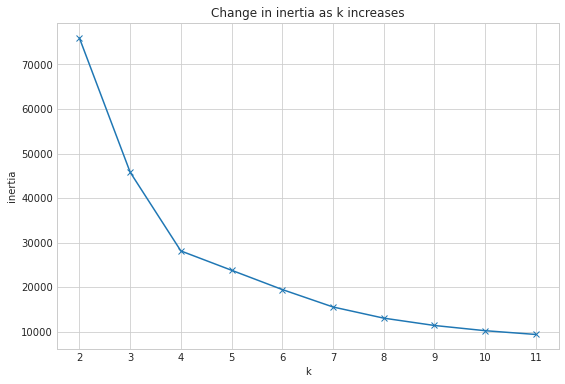

In [6]:
# elbow method
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    #drop of at 3

In [7]:
######Defining##############

# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=4, random_state = 123)

# fit the thing
kmeans.fit(X)

# Use (predict using) the thing 
kmeans.predict(X)

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 0, 1,
       2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 3, 0,
       2, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 1, 0, 1, 3, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [8]:
# make a new column names cluster in iris and X_scaled dataframe
mall['cluster'] = kmeans.predict(X)
X['cluster'] = kmeans.predict(X)

In [9]:
X.head()

,age,spending_score,cluster
0,19,39,0
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,0


In [10]:
#not scaled us groupby
centroid = X.groupby('cluster')['spending_score', 'age'].mean()
centroid

,spending_score,age
cluster,,
0,49.15,27.62
1,82.35,30.18
2,15.02,43.29
3,48.23,55.71


Text(0.5, 1.0, 'Visualizing Cluster Centers')

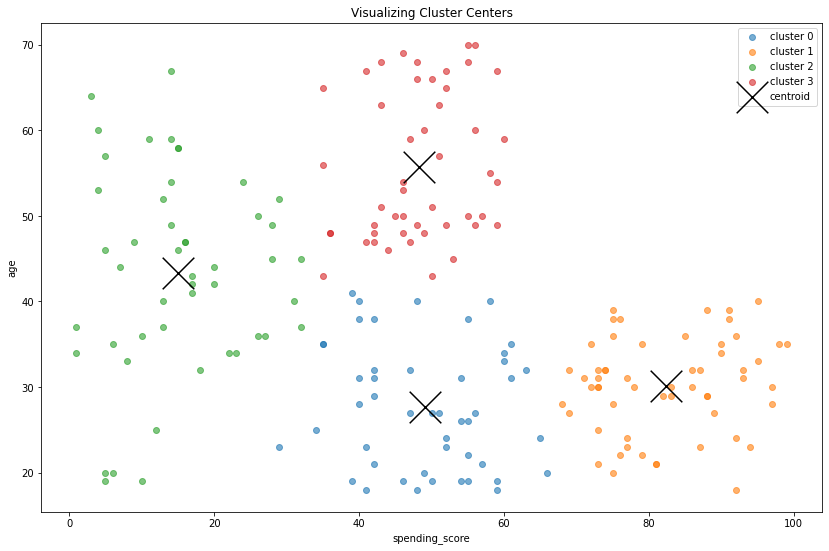

In [11]:
plt.figure(figsize=(14, 9))

for cluster, subset in X.groupby('cluster'):
    plt.scatter(subset.spending_score, subset.age, label='cluster ' + str(cluster), alpha=.6)

centroid.plot.scatter(y= 'age', x='spending_score', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('spending_score')
plt.ylabel('age')
plt.title('Visualizing Cluster Centers')

### 3.) How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [4]:
mall = acquire.get_mall_data()
mall.head()



,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#selected the features
X = mall[['age', 'spending_score']] 

In [6]:
# Scale the X features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

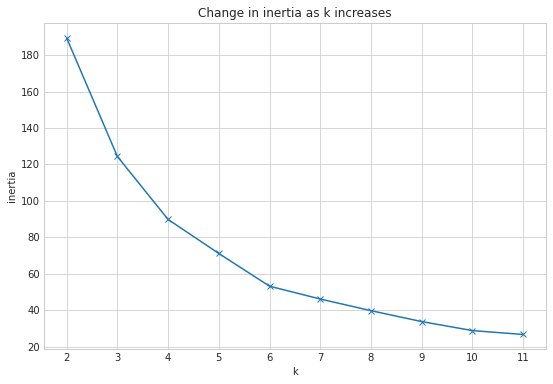

In [7]:
# elbow method
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    #drop of at 4

In [9]:
######Defining##############

# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=4, random_state = 123)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([0, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 1, 3, 1, 3,
       2, 3, 1, 0, 0, 0, 1, 3, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       3, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 3, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       0, 3, 0, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 1, 3, 0, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 0, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       0, 3], dtype=int32)

In [12]:
X_scaled['cluster'] = kmeans.predict(X_scaled)

In [14]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,age,spending_score
0,-0.83,-0.39
1,1.23,-0.07
2,0.63,-1.37
3,-0.61,1.15


Text(0.5, 1.0, 'Visualizing Cluster Centers')

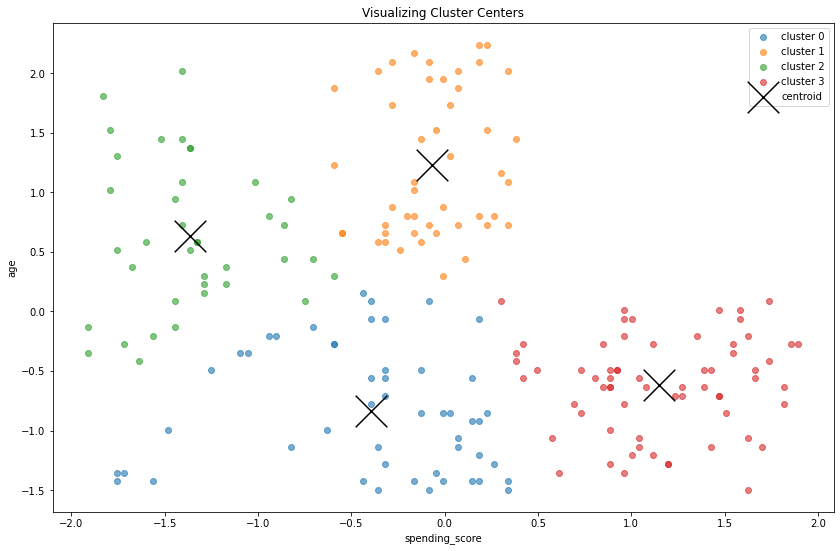

In [15]:
plt.figure(figsize=(14, 9))

for cluster, subset in X_scaled.groupby('cluster'):
    plt.scatter(subset.spending_score, subset.age, label='cluster ' + str(cluster), alpha=.6)

centroids_scaled.plot.scatter(y= 'age', x='spending_score', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('spending_score')
plt.ylabel('age')
plt.title('Visualizing Cluster Centers')

### Bonus
- a) Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing
- b) Visualize the data and guess the number and shape of the clusters.
- c) Implement the KMeans algorithm on unscaled data and visualize the clusters.
- d) Repeat the step above but with scaled data. 
- e) Write down the takeaways from this exercise.